In [4]:
import tensorflow as tf
import numpy as np
import glob
from scipy import misc 
import matplotlib.pyplot as plt
%matplotlib inline

tf_keras = tf.contrib.keras

In [5]:
# load pre-trained VGG model
model = tf_keras.applications.VGG19(weights='imagenet',
                                    input_shape = (224, 224, 3))

In [6]:
def make_prediction(img_path):
    
    # Load and resize image
    img = tf_keras.preprocessing.image.load_img(img_path,
                                                target_size=(224, 224))
    
    # transform image into a 4D tensor
    x = tf_keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    # normalize/preprocess image
    x = tf_keras.applications.vgg19.preprocess_input(x)

    # make predcition
    preds = model.predict(x)
    
    # decode the results into a list of tuples
    #(class, description, probability)
    result = tf_keras.applications.vgg19.decode_predictions(
        preds, top=3)[0]

    print("Predictions:\n")
    for idx, (_, name, prob) in enumerate(result):
        print("{}.".format(idx+1))
        print("Name: {}".format(name))
        print("Probability: {}\n".format(prob))

In [7]:
def plot_image(img_path):
    # figure size
    fig = plt.figure(figsize=(8, 8))
    
    # load images
    image = tf_keras.preprocessing.image.load_img(img_path)
    img_array = tf_keras.preprocessing.image.img_to_array(image)
    print("Image size: {}".format(img_array.shape))
    
    # plot image
    plt.imshow(image)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()

Image size: (667L, 1000L, 3L)


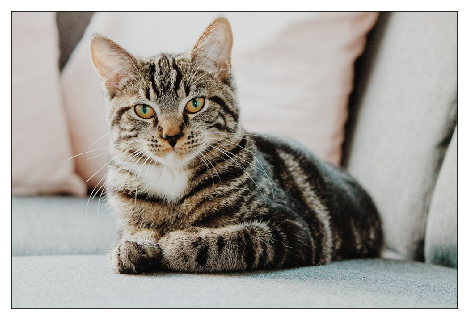

In [8]:
cat_path = "../cat.jpg"
plot_image(cat_path)

In [9]:
make_prediction(cat_path)

Predictions:

1.
Name: tabby
Probability: 0.660485446453

2.
Name: tiger_cat
Probability: 0.233899623156

3.
Name: Egyptian_cat
Probability: 0.0607701316476



Image size: (225L, 225L, 3L)


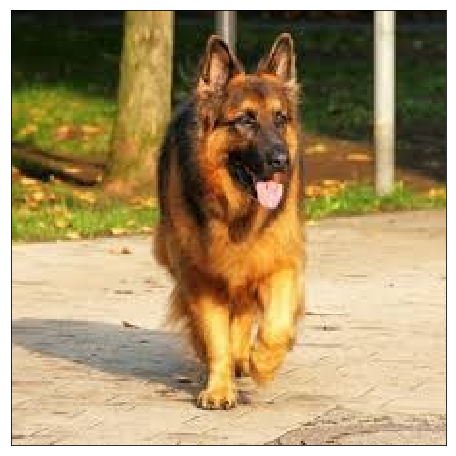

In [10]:
dog_path = "../dog.jpg"
plot_image(dog_path)

In [11]:
make_prediction(dog_path)

Predictions:

1.
Name: German_shepherd
Probability: 0.991357326508

2.
Name: malinois
Probability: 0.00302687031217

3.
Name: briard
Probability: 0.00127539644018



In [12]:
train_data_dir = "data/training"
test_data_dir = "data/testing"
# 25000 images
train_size = 20000
test_size = 5000
input_shape = (150, 150, 3)
batch_size = 32

In [13]:
# load pre-trained VGG model and exclude top dense layers
model = tf_keras.applications.VGG16(include_top=False,
                                    weights='imagenet')

In [14]:
def load_data_array(img_files):
    img_size = (150, 150, 3)
    images = []
    for img in img_files:
        try:
            image_ar = misc.imresize(misc.imread(img), img_size)
            if np.asarray(image_ar).shape == img_size:
                images.append(image_ar)
        except:
            print("ERROR: {}".format(img))
            continue

    images = np.asarray(images)
    return images

In [17]:
path_d = glob.glob("../data/training/cat/*.jpg")
train_cat = load_data_array(path_d)

C:\Users\Farhad\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\Farhad\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


In [18]:
path_d = glob.glob("../data/training/dog/*.jpg")
train_dog = load_data_array(path_d)

C:\Users\Farhad\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\Farhad\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


In [19]:
path_d = glob.glob("../data/testing/cat/*.jpg")
test_cat = load_data_array(path_d)

C:\Users\Farhad\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\Farhad\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


In [20]:
path_d = glob.glob("../data/test/dog/*.jpg")
test_dog = load_data_array(path_d)

In [21]:
def extract_vgg_features(model, images, data_name):
    
    # Extract image features
    extracted_features = model.predict(images)
    
    # save new features
    file_name = "extracted_features_{}.npy".format(data_name)
    np.save(open(file_name, 'w'), extracted_features)

# train set (this can take a long time, GPU recommended)
## extract_vgg_features(model, train_cat, data_name = 'train_cat')
## extract_vgg_features(model, train_dog, data_name = 'train_dog')

In [24]:
# load train set
train_data_cat = np.load(open('../extracted_features_train_cat.npy', 'rb'))
train_data_dog = np.load(open('../extracted_features_train_dog.npy', 'rb'))
train_data = np.vstack((train_data_cat, train_data_dog))

# generate train labels (the image extracted features were saved in order)
train_labels = np.array([0] * train_data_cat.shape[0]  +
                        [1] * train_data_dog.shape[0])
print("Train size: {}".format(train_data.shape))

Train size: (19970L, 4L, 4L, 512L)


In [26]:
# load test set
test_data_cat = np.load(open('../extracted_features_test_cat.npy', 'rb'))
test_data_dog = np.load(open('../extracted_features_test_dog.npy', 'rb'))
test_data = np.vstack((test_data_cat, test_data_dog))

# generate train labels (the image extracted features were saved in order)
test_labels = np.array([0] * test_data_cat.shape[0]  +
                       [1] * test_data_dog.shape[0])
print("Train size: {}".format(test_data.shape))

Train size: (4996L, 4L, 4L, 512L)


In [27]:
def DNN_Classifier():
    
     # input image tensor
    inputs = tf_keras.layers.Input(shape = (4, 4, 512))
    
    # flatten/reshape layer
    net = tf_keras.layers.Flatten()(inputs)

    # fully connected layer
    net = tf_keras.layers.Dense(256, activation=tf.nn.relu)(net)
    
    # dropout layer
    net = tf_keras.layers.Dropout(0.6)(net)

    # final Dense layer with binary classification
    outputs = tf_keras.layers.Dense(1, activation=tf.nn.sigmoid)(net)

    # model
    model = tf_keras.models.Model(inputs=inputs, outputs=outputs)
    
    return model

def compile_model(model):

    # SGD/optimizer
    optimizer = tf_keras.optimizers.RMSprop(lr=0.0001)

    # compile the model with loss, optimizer and evaluation metrics
    model.compile(loss = tf_keras.losses.binary_crossentropy,
                  optimizer = optimizer,
                  metrics = [tf_keras.metrics.binary_accuracy])

    print(model.summary())
    
    return model

In [28]:
model = DNN_Classifier()
model = compile_model(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 4, 4, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
history = model.fit(x=train_data, y=train_labels, batch_size=32,
          verbose=2, epochs=20, validation_data=(test_data,test_labels))

Train on 19970 samples, validate on 4996 samples
Epoch 1/20
 - 34s - loss: 1.1538 - binary_accuracy: 0.8978 - val_loss: 0.5478 - val_binary_accuracy: 0.9478
Epoch 2/20
 - 30s - loss: 0.6280 - binary_accuracy: 0.9387 - val_loss: 0.4331 - val_binary_accuracy: 0.9504
Epoch 3/20
 - 30s - loss: 0.3960 - binary_accuracy: 0.9521 - val_loss: 0.3412 - val_binary_accuracy: 0.9564
Epoch 4/20
 - 30s - loss: 0.2781 - binary_accuracy: 0.9627 - val_loss: 0.2945 - val_binary_accuracy: 0.9562
Epoch 5/20
 - 30s - loss: 0.2078 - binary_accuracy: 0.9680 - val_loss: 0.3305 - val_binary_accuracy: 0.9544
Epoch 6/20
 - 30s - loss: 0.1791 - binary_accuracy: 0.9748 - val_loss: 0.3138 - val_binary_accuracy: 0.9562
Epoch 7/20
 - 30s - loss: 0.1353 - binary_accuracy: 0.9809 - val_loss: 0.3278 - val_binary_accuracy: 0.9584
Epoch 8/20
 - 31s - loss: 0.1208 - binary_accuracy: 0.9825 - val_loss: 0.3386 - val_binary_accuracy: 0.9586
Epoch 9/20
 - 32s - loss: 0.1071 - binary_accuracy: 0.9851 - val_loss: 0.3499 - val_bin

In [30]:
model.evaluate(test_data,test_labels, batch_size=32, verbose=1)

4996/4996 [==============================] - 1s 208us/step


[0.38601843390052526, 0.9597678142514011]

In [31]:
def plot_accuracy_and_loss(history):
    plt.figure(1, figsize= (15, 10))
    
    # plot train and test accuracy
    plt.subplot(221)
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('vgg accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # plot train and test loss
    plt.subplot(222)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('vgg loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    
    plt.show()

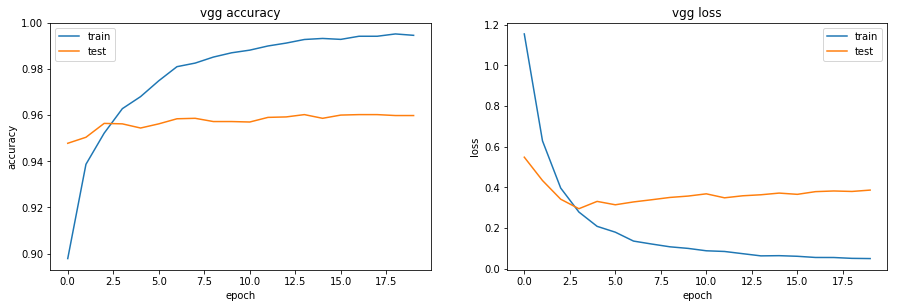

In [32]:
plot_accuracy_and_loss(history)

In [33]:
#save model
model_json = model.to_json()
open('cat_and_dog_model.json', 'w').write(model_json)
model.save_weights('image_classifier_cat_and_dog.h5', overwrite=True)